<a href="https://colab.research.google.com/github/BrajeshSonar/BrajeshSonar/blob/main/Feature_Selection_Using_Filter_Based_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif, f_classif
import matplotlib.pyplot as plt

# Load the dataset
features_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/features.txt", sep="\s+", header=None, names=["index", "feature"])
features = features_df["feature"].values

# Load data
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train/y_train.txt", header=None)
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test/y_test.txt", header=None)

# Assign column names
X_train.columns = features
X_test.columns = features
y_train.columns = ['Activity']
y_test.columns = ['Activity']



<ipython-input-6-63fd7756a9c9>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-6-63fd7756a9c9>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


In [ ]:
# --- STEP 2: Train baseline model on ALL features ---

clf_all = RandomForestClassifier(random_state=42)
clf_all.fit(X_train, y_train)
y_pred_all = clf_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"\n Accuracy using ALL features: {acc_all:.4f}")



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



 Accuracy using ALL features: 0.9257


In [ ]:
# --- STEP 3: Filter-based Feature Selection (Mutual Info + Fisher-score) ---
# Mutual Information
mi_scores = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi_scores, index=X_train.columns)

# Fisher-score
f_scores, _ = f_classif(X_train, y_train)
f_series = pd.Series(f_scores, index=X_train.columns)

# Combine scores (average of ranks)
combined_scores = (mi_series.rank() + f_series.rank()) / 2

# Sort features by combined rank (lower is better)
sorted_features = combined_scores.sort_values()

# Automatically select top N features where N = 50% of total features
N = len(sorted_features) // 2
selected_features = sorted_features.iloc[:N].index.tolist()

print(f"\nSelected Top-{len(selected_features)} Features (Auto N = 50%):\n", selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Selected Top-280 Features (Auto N = 50%):
 ['tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyroJerkMag-arCoeff()3', 'tBodyAccJerkMag-arCoeff()3', 'tBodyGyroJerk-arCoeff()-Y,4', 'tBodyGyroMag-arCoeff()4', 'tBodyGyroMag-arCoeff()3', 'angle(tBodyGyroJerkMean,gravityMean)', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,4', 'tBodyGyroJerk-arCoeff()-Y,3', 'tBodyGyro-arCoeff()-X,3', 'tBodyAccJerk-arCoeff()-Y,4', 'tBodyAccJerkMag-arCoeff()4', 'tBodyAccJerk-arCoeff()-Y,3', 'tBodyGyroJerk-correlation()-X,Z', 'tBodyAcc-arCoeff()-Y,3', 'tBodyGyroJerkMag-arCoeff()4', 'fBodyBodyGyroJerkMag-meanFreq()', 'tBodyGyro-arCoeff()-Y,4', 'fBodyGyro-kurtosis()-X', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAccJerk-arCoeff()-Y,2', 'fBodyGyro-skewness()-X', 'tBodyGyroJerk-correlation()-X,Y', 'tBodyGyroJerk-arCoeff()-Z,4', 'tBodyGyro-arCoeff()-Y,3', 'fBodyBodyGyroMag-kurtosis()', 'tBodyGyroJerk-correlation()-Y,Z', 'angle(tBodyAccJerkMean),gravityMean)', 'tBodyAccJerk-correlation()-X,Z', 'tBodyGyroJerk-arCoeff()-X,3', 'tBodyAc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# --- STEP 4: Train model on SELECTED features only ---

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)
print(f"\nAccuracy using SELECTED Top-{len(selected_features)} features: {acc_selected:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy using SELECTED Top-280 features: 0.9355


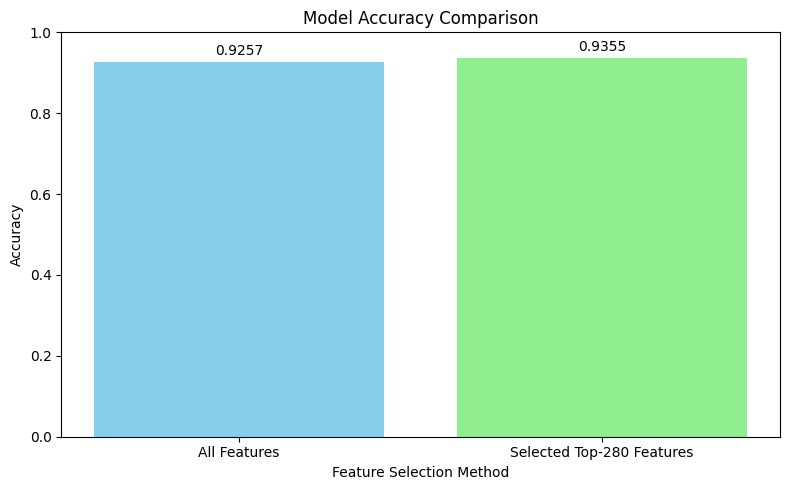

In [ ]:
# --- STEP 5: Visualization of Performance Analysis ---

# Accuracy scores
accuracies = [acc_all, acc_selected]
labels = ['All Features', f'Selected Top-{len(selected_features)} Features']

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Feature Selection Method")

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{acc:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()